In [1]:
from bioblend.galaxy import GalaxyInstance
import pandas as pd
from io import StringIO
import os
import requests
import seaborn as sns

# Add galaxy API key
Add `GALAXY_API_KEY` from `https://usegalaxy.eu/user/api_key` via `export GALAXY_API_KEY="<key>"` or `%env  GALAXY_API_KEY=<key>` in jupyter

In [2]:
%env GALAXY_API_KEY=cc8ab6117e2e58a8ca8ac12ce8680ed8

env: GALAXY_API_KEY=cc8ab6117e2e58a8ca8ac12ce8680ed8


In [3]:
history_id = "737d864aaf9b7c41"
collection_name = "VFs"

gi = GalaxyInstance(url='https://usegalaxy.eu/', key=os.environ['GALAXY_API_KEY'])

datasets = gi.datasets.get_datasets(name = collection_name, history_id = history_id)

#print(datasets)

#fetch collection by name
if len(datasets) > 1:
    print("too many datasets with that name")

for dataset in datasets:
    if dataset['history_content_type']=='dataset_collection': #get only collections
        if dataset['job_state_summary']['all_jobs'] == dataset['job_state_summary']['ok']: #get only collections where all jobs are ok
            dataset_collection_id = dataset["id"]


# get data of the elements in the collection
collection = gi.dataset_collections.show_dataset_collection(dataset_collection_id = dataset_collection_id)




too many datasets with that name


In [4]:
dfs = []

for element in collection['elements']:

    element_name = element['element_identifier']

    print(element_name)

    element_id = element['object']['id']
    data = gi.datasets.download_dataset(element_id, maxwait = 3)
    df = pd.read_csv(StringIO(data.decode("utf-8")), sep="\t")

    dfs.append(df)

    # # get only species
    # df = df.loc[(df.iloc[:,3] == "S")]

    # #set taxa as index without space
    # df.index = df.iloc[:,5].str.replace(" ","")

    # # get only abundance for the sample
    # df = df.iloc[:,0]

    # df.name = element_name

    # dfs.append(df)


split_file_000000.txt
split_file_000001.txt
split_file_000002.txt
split_file_000003.txt
split_file_000004.txt
split_file_000005.txt
split_file_000006.txt
split_file_000007.txt
split_file_000008.txt
split_file_000009.txt
split_file_000010.txt
split_file_000011.txt
split_file_000012.txt
split_file_000013.txt
split_file_000014.txt
split_file_000015.txt
split_file_000016.txt
split_file_000017.txt
split_file_000018.txt
split_file_000019.txt
split_file_000020.txt
split_file_000021.txt
split_file_000022.txt
split_file_000023.txt
split_file_000024.txt
split_file_000025.txt
split_file_000026.txt
split_file_000027.txt
split_file_000028.txt
split_file_000029.txt
split_file_000030.txt
split_file_000031.txt
split_file_000032.txt
split_file_000033.txt
split_file_000034.txt
split_file_000035.txt
split_file_000036.txt
split_file_000037.txt
split_file_000038.txt
split_file_000039.txt
split_file_000040.txt
split_file_000041.txt
split_file_000042.txt
split_file_000043.txt
split_file_000044.txt
split_file

In [5]:
main_df = pd.concat(dfs, join="outer", axis = 0)

outpath = "data/output"
os.makedirs(outpath, exist_ok=True)

main_df.to_csv(os.path.join(outpath,"palestine_VFs_v1.csv"))

In [6]:
pd.set_option('display.max_colwidth', None)

main_df["Strain"] = main_df["PRODUCT"].str.extract(r'.*\[([^\]]+)\]')
main_df.set_index("ACCESSION", inplace=True)

print(main_df.to_string())

               SampleID             SEQUENCE    START      END STRAND       GENE       COVERAGE     COVERAGE_MAP   GAPS  %COVERAGE  %IDENTITY DATABASE                                                                                                                                                                                                                                PRODUCT  RESISTANCE                                                            Strain
ACCESSION                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
NP_462663     barcode01   barcode01_contig_1   934349   935044      +       mgtC

In [12]:
palestineVFs = pd.read_csv('data/PalestineVFheatmapSampleNo.csv')

accession_mapping = {}
for index, row in main_df.iterrows():
    accession_mapping[index] = row["Strain"]

def change_accession_with_strain(val):
    return(accession_mapping[val])


#palestineVFs

palestineVFs.index = palestineVFs["VF Accession ID"].apply(change_accession_with_strain)

palestineVFs



VF Accession ID  \
VF Accession ID                                                                    
Escherichia coli O18:K1:H7 str. RS218                                   AAF37887   
Salmonella enterica (serovar typhimurium)                               AAG03023   
Salmonella enterica subsp. enterica serovar Typhimurium str. LT2        AAL20547   
Campylobacter jejuni subsp. jejuni NCTC 11168                          NP_281263   
Campylobacter jejuni subsp. jejuni NCTC 11168                          NP_281264   
...                                                                          ...   
Campylobacter jejuni subsp. jejuni NCTC 11168                       YP_002344468   
Campylobacter jejuni subsp. jejuni NCTC 11168                       YP_002344511   
Campylobacter jejuni subsp. jejuni NCTC 11168                       YP_002344633   
Campylobacter jejuni subsp. jejuni NCTC 11168                       YP_002344845   
Campylobacter jejuni subsp. jejuni NCTC 11168                       YP_002344846   

                                                                  S01  S02  \
VF Accession ID                                                              
Escherichia coli O18:K1:H7 str. RS218                               1    1   
Salmonella enterica (serovar typhimurium)                           1    1   
Salmonella enterica subsp. enterica serovar Typhimurium str. LT2    1    1   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
...                                                               ...  ...   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   

                                                                  S03  S04  \
VF Accession ID                                                              
Escherichia coli O18:K1:H7 str. RS218                               1    1   
Salmonella enterica (serovar typhimurium)                           1    1   
Salmonella enterica subsp. enterica serovar Typhimurium str. LT2    1    1   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
...                                                               ...  ...   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   

                                                                  S05  S06  \
VF Accession ID                                                              
Escherichia coli O18:K1:H7 str. RS218                               1    1   
Salmonella enterica (serovar typhimurium)                           1    1   
Salmonella enterica subsp. enterica serovar Typhimurium str. LT2    1    1   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
...                                                               ...  ...   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campylobacter jejuni subsp. jejuni NCTC 11168                       0    0   
Campyl

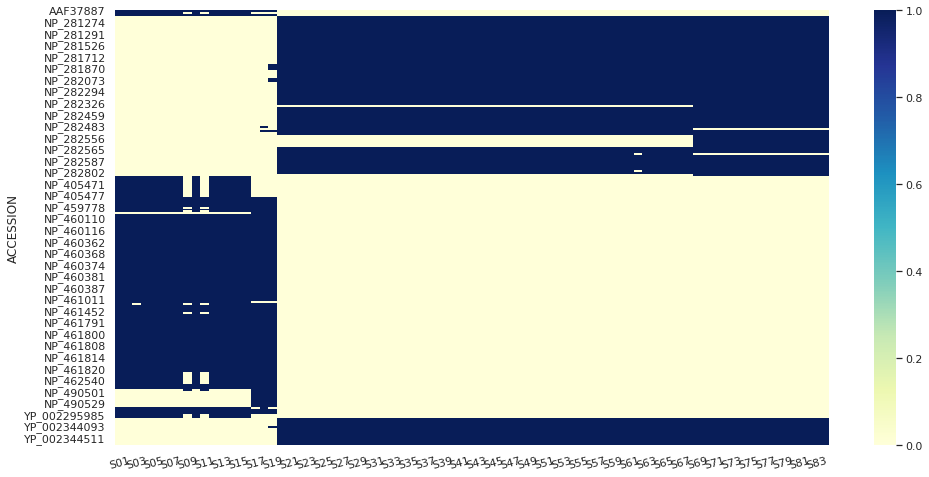

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
palestineVFs = pd.read_csv('data/PalestineVFheatmapSampleNo.csv')
palestineVFs.set_index("VF Accession ID", inplace=True)
palestineVFs.index.name = "ACCESSION"
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
#sns.clustermap(palestineVFs, yticklabels=True, xticklabels=True)
sns.heatmap(palestineVFs, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()

In [82]:
palestineVFs['Strain'] = main_df['Strain']

#key_list = list(palestineVFs["ACCESSION"])
#dict_lookup = dict(zip(main_df['ACCESSION'], main_df['Strain']))
#palestineVFs['ACCESSION'] = [dict_lookup[item] for item in key_list]

palestineVFs


ValueError: cannot reindex on an axis with duplicate labels

/home/nasr/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/nasr/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


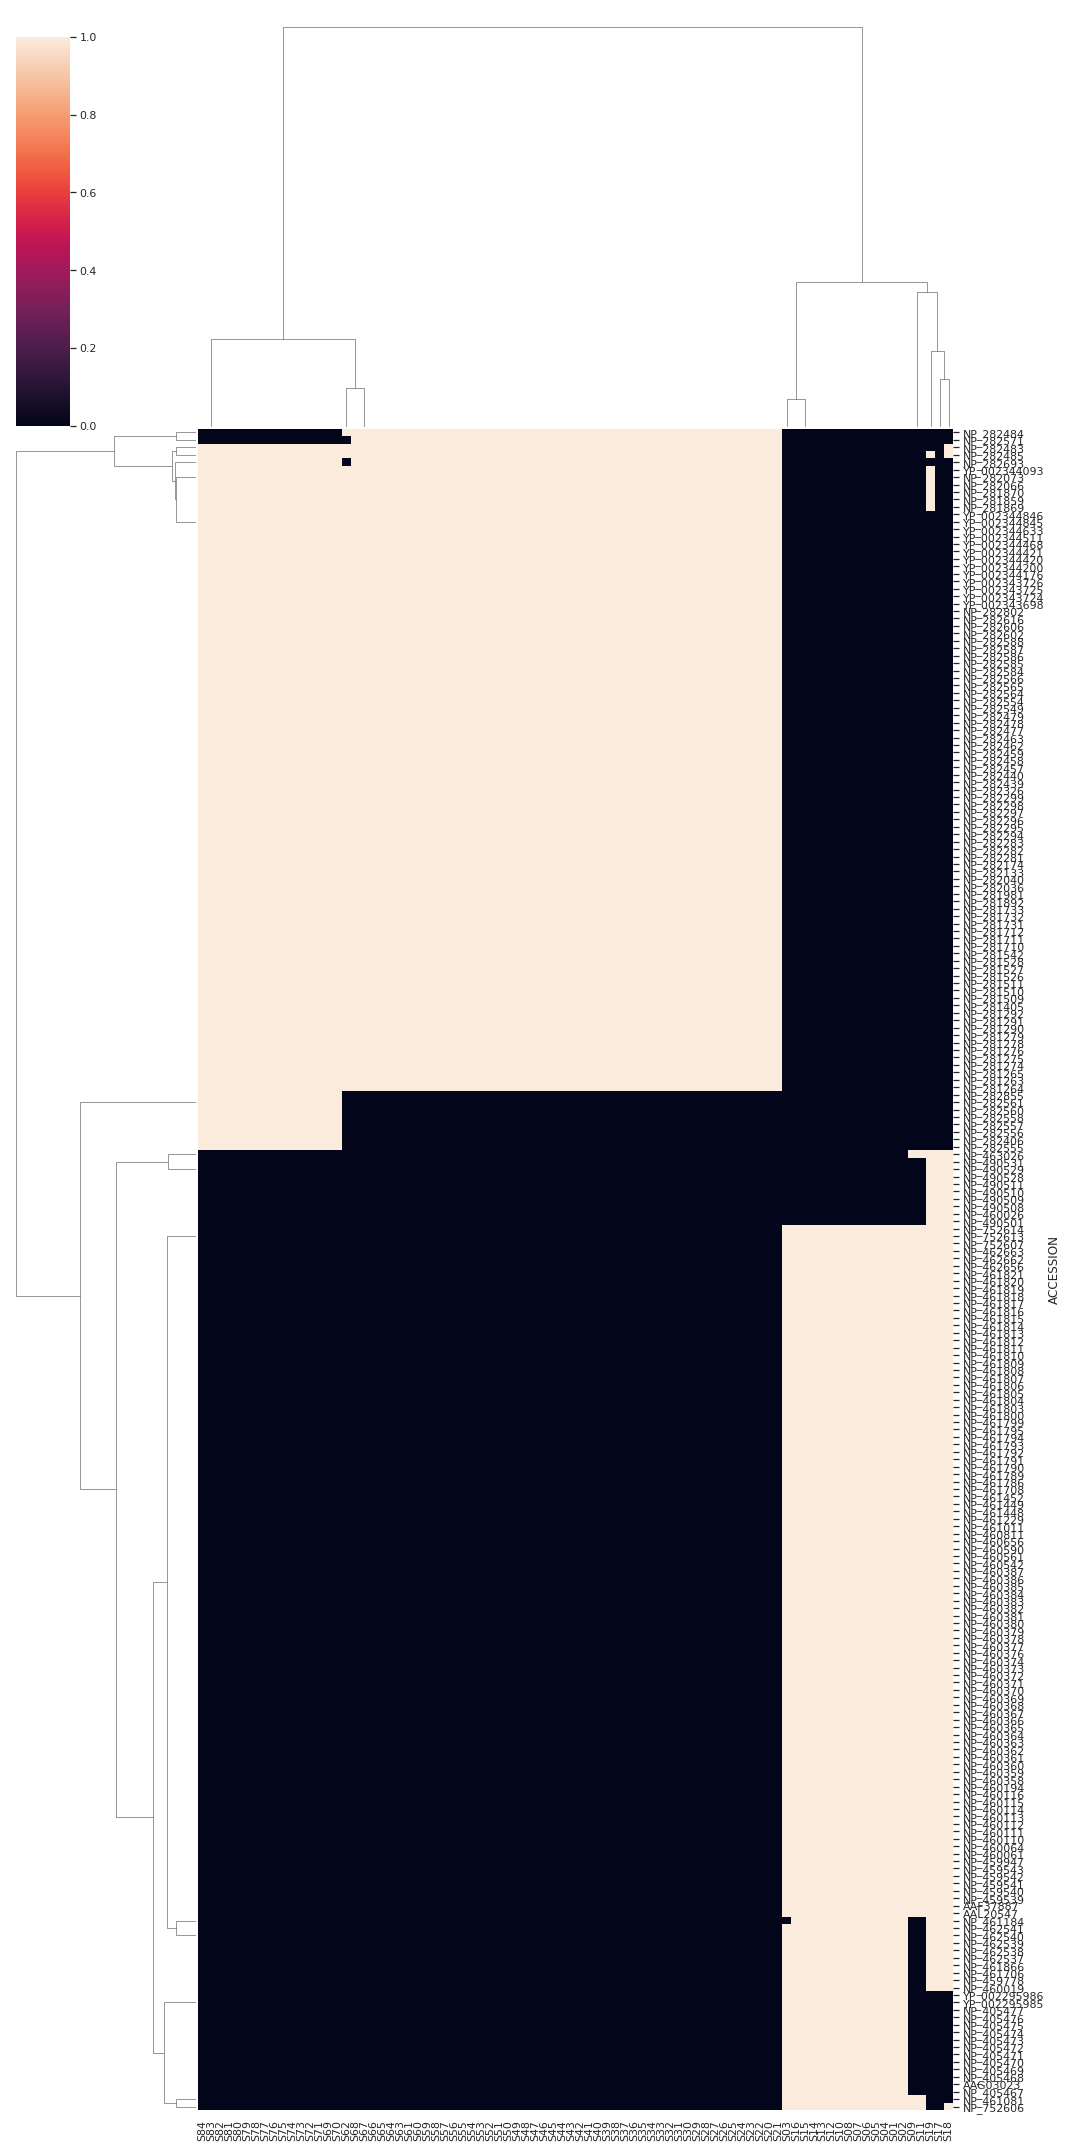

In [49]:
sns.clustermap(palestineVFs,figsize=(15, 30), yticklabels=True, xticklabels=True)